In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = '/content/drive/MyDrive/FakeNewsDataset/train.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [5]:
x = df.drop('label', axis=1)

In [6]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [7]:
df.shape

(20800, 5)

In [8]:
df = df.dropna()

In [9]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [10]:
df.shape

(18285, 5)

In [11]:
message = df.copy()

In [12]:
message.reset_index(inplace=True)

In [13]:
message.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [14]:
y = message['label']
y.head(10)

0    1
1    0
2    1
3    1
4    1
5    0
6    0
7    0
8    0
9    0
Name: label, dtype: int64

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
ps = PorterStemmer()
corpus = []

In [18]:
for i in range(0, len(message)):
  msg = message['title'][i]
  review = re.sub('[^a-zA-z]', ' ', msg)
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [19]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic [photos]',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hi

In [20]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [21]:
voc_size = 5000

#One Hot Encoding

In [22]:
onehot_en = [one_hot(words, voc_size) for words in corpus]
print(onehot_en)

[[3417, 4075, 884, 1082, 4851, 3833, 154, 2386, 2384, 1322], [3060, 2613, 2959, 2028, 2845, 4035, 2662], [865, 2386, 3817, 2687], [719, 2555, 2767, 184, 3381, 1913], [3937, 2845, 2938, 4587, 4259, 1351, 2845, 875, 4266, 3468], [585, 340, 1683, 2009, 572, 2946, 3076, 3318, 4584, 4875, 4031, 4300, 4215, 2080, 2662], [126, 1207, 4804, 1121, 3579, 1565, 1775, 694, 206, 3768, 1970], [4576, 637, 2412, 950, 1427, 860, 2946, 3800, 206, 3768, 1970], [4020, 1641, 2512, 135, 3877, 3899, 2929, 4379, 2946, 3103], [1970, 2801, 1121, 3725, 1430, 2150, 2701, 4731], [2496, 1705, 1431, 1068, 4308, 1728, 4923, 2923, 4451, 4792, 1839], [184, 636, 4851, 3899, 2946, 1427], [4963, 4766, 3317, 2258, 3435, 2039, 2848, 4513, 1609], [2806, 741, 721, 4986, 2206, 780, 2419, 206, 3768, 1970], [2479, 3076, 3862, 4878, 2368, 206, 3768, 1970], [2712, 1153, 935, 1029, 135, 3203, 2531, 1934, 1867, 2438], [2169, 4256, 2613], [1532, 4501, 3293, 21, 2946, 3975, 2104, 2662], [4720, 2030, 2959, 4797, 3812, 4342, 113, 2144, 1

In [23]:
for i in range(4):
  print("Corpus: "+corpus[i])
  print("One Hot Encoding: "+str(onehot_en[i]))

Corpus: hous dem aid even see comey letter jason chaffetz tweet
One Hot Encoding: [3417, 4075, 884, 1082, 4851, 3833, 154, 2386, 2384, 1322]
Corpus: flynn hillari clinton big woman campu breitbart
One Hot Encoding: [3060, 2613, 2959, 2028, 2845, 4035, 2662]
Corpus: truth might get fire
One Hot Encoding: [865, 2386, 3817, 2687]
Corpus: civilian kill singl us airstrik identifi
One Hot Encoding: [719, 2555, 2767, 184, 3381, 1913]


In [24]:
sent_len = 20
embedded_rpre = pad_sequences(onehot_en, padding='pre', maxlen=sent_len)
print(embedded_rpre)

[[   0    0    0 ... 2386 2384 1322]
 [   0    0    0 ... 2845 4035 2662]
 [   0    0    0 ... 2386 3817 2687]
 ...
 [   0    0    0 ...  206 3768 1970]
 [   0    0    0 ...  617  196 4034]
 [   0    0    0 ... 1258 3982 4059]]


In [25]:
print(embedded_rpre[0])

[   0    0    0    0    0    0    0    0    0    0 3417 4075  884 1082
 4851 3833  154 2386 2384 1322]


In [26]:
embedding_vector_fetures = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_fetures, input_length=sent_len))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
x_final = np.array(embedded_rpre)
y_final = np.array(y)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.33, random_state = 42)

In [39]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10, batch_size=64)

Epoch 1/10
192/192 [==============================] - 8s 34ms/step - loss: 0.3376 - accuracy: 0.8380 - val_loss: 0.1968 - val_accuracy: 0.9137
Epoch 2/10
192/192 [==============================] - 6s 32ms/step - loss: 0.1414 - accuracy: 0.9444 - val_loss: 0.2241 - val_accuracy: 0.9183
Epoch 3/10
192/192 [==============================] - 6s 32ms/step - loss: 0.1020 - accuracy: 0.9617 - val_loss: 0.2364 - val_accuracy: 0.9074
Epoch 4/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0771 - accuracy: 0.9728 - val_loss: 0.2761 - val_accuracy: 0.9178
Epoch 5/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0595 - accuracy: 0.9803 - val_loss: 0.3220 - val_accuracy: 0.9117
Epoch 6/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0443 - accuracy: 0.9864 - val_loss: 0.3500 - val_accuracy: 0.9104
Epoch 7/10
192/192 [==============================] - 6s 32ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.3464 - val_accuracy: 0.8986

#Adding Dropout

In [31]:
# embedding_vector_fetures = 40
# model = Sequential()
# model.add(Embedding(voc_size, embedding_vector_fetures, input_length=sent_len))
# model.add(LSTM(100))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


#Confusion Matrix and Accuracy

In [40]:
y_preds = model.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
y_preds = (y_preds>0.5)

In [43]:
print(y_preds[0:10])

[[ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [44]:
y_test[0:10]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

In [45]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[3104  315]
 [ 237 2379]]


In [46]:
ac_score = accuracy_score(y_test, y_preds)
print(ac_score)

0.9085335542667772


In [47]:
import matplotlib.pyplot as plt

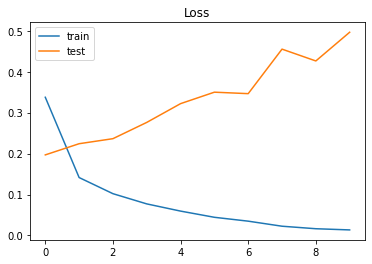

In [48]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

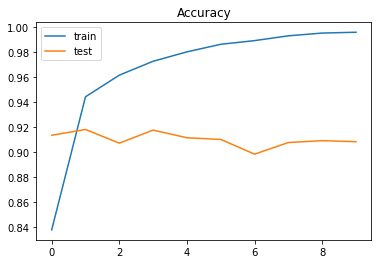

In [49]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();